# 9. Wprowadzenie do analizy czasowych szeregów danych

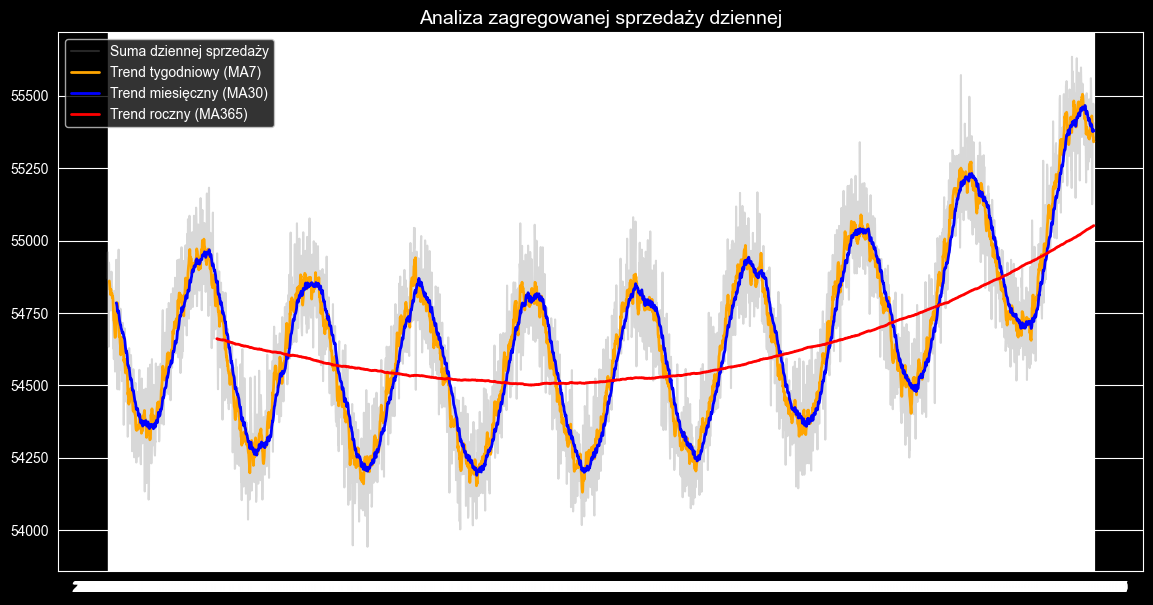

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub as kg
from kagglehub import KaggleDatasetAdapter

data_set_path = "train.csv"
df = kg.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "samuelcortinhas/time-series-practice-dataset",
    data_set_path
)

daily_sales = df.groupby('Date')['number_sold'].sum().reset_index()
daily_sales.set_index('Date', inplace=True)

# 3. Obliczanie średnich ruchomych (7 i 30 dni)
daily_sales['MA7'] = daily_sales['number_sold'].rolling(window=7).mean()
daily_sales['MA30'] = daily_sales['number_sold'].rolling(window=30).mean()
daily_sales['MA365'] = daily_sales['number_sold'].rolling(window=365).mean()
# Wizualizacja danych

plt.figure(figsize=(14, 7))
plt.plot(daily_sales['number_sold'], label='Suma dziennej sprzedaży', alpha=0.3, color='gray')
plt.plot(daily_sales['MA7'], label='Trend tygodniowy (MA7)', color='orange', linewidth=2)
plt.plot(daily_sales['MA30'], label='Trend miesięczny (MA30)', color='blue', linewidth=2)
plt.plot(daily_sales['MA365'], label='Trend roczny (MA365)', color='red', linewidth=2)
plt.title("Analiza zagregowanej sprzedaży dziennej", fontsize=14)
plt.legend()
plt.show()

#df.describe(include='all')

## Analiza autokorelacji (ACF i PACF)

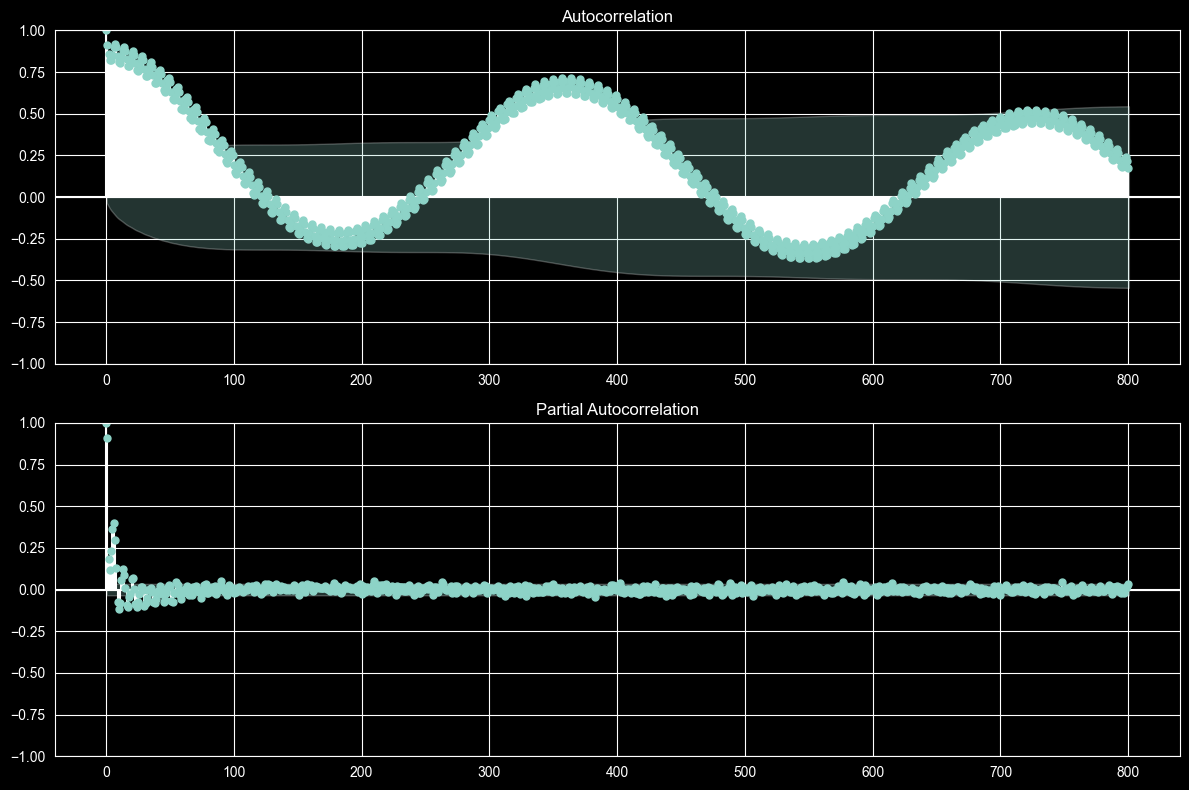

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF i PACF

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(daily_sales['number_sold'], lags=800, ax=ax1)
plot_pacf(daily_sales['number_sold'], lags=800, ax=ax2, method='ywm')
plt.tight_layout()
plt.show()

## Dekompozycja szeregów czasowych

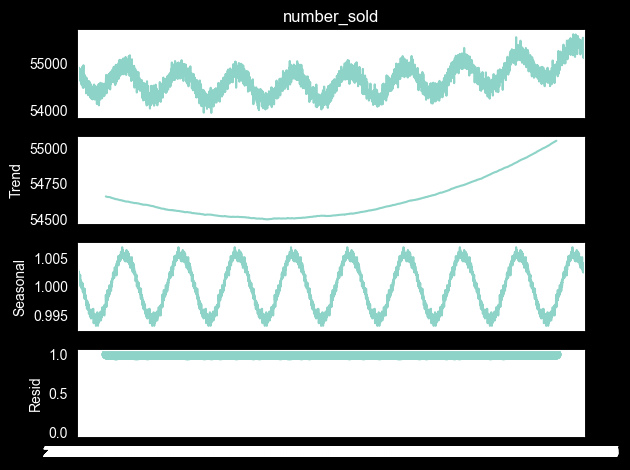

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Dekompozycja addytywna

result = seasonal_decompose(daily_sales['number_sold'], model='multiplicative', period=365)
#result = seasonal_decompose(daily_sales['number_sold'], model='additive', period=365)
result.plot()
plt.show()

# Test t-Studenta dla dwóch prób niezależnych

In [31]:
import numpy as np
from scipy.stats import ttest_ind

daily_sales.index = pd.to_datetime(daily_sales.index)
december_sales = daily_sales[daily_sales.index.month == 12]['number_sold']
other_months_sales = daily_sales[daily_sales.index.month != 12]['number_sold']

# Test t-Studenta
stat, p_value = ttest_ind(december_sales, other_months_sales)

# Wyniki
print("Statystyka testowa:", stat)
print("P-wartość:", p_value)
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową")
else:
    print("Brak podstaw do odrzucenia hipotezy zerowej")

Statystyka testowa: 14.26708091922834
P-wartość: 7.475154497191465e-45
Odrzucamy hipotezę zerową
